HIMAM BASHIRAN (2311110055)

Buatlah model regresi non linear untuk data iris dengan: fungsi sigmoid dan fungsi cubic. Bandingkan hasilnya dengan regresi linear, mana yang paling tepat menurut anda?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Encoding untuk Variabel Species

In [5]:
encoding_species = {
    'setosa' : 0, 
    'versicolor' : 1, 
    'virginica' : 2}
df['species'] = df['species'].map(encoding_species)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

# Menetapkan Variabel Input & Target

In [8]:
X = df[['sepal_length']].values.reshape(-1, 1)
y = df['petal_length']

In [9]:
print(X.shape)
print(y.shape)

(150, 1)
(150,)


 # Membagi data menjadi 80/20

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.intercept_

-6.927127731475695

In [14]:
lr.coef_

array([1.8339626])

In [15]:
# Prediksi Model
y_pred = lr.predict(X_test)
y_pred

array([4.26004412, 3.52645908, 7.19438428, 4.07664786, 5.54381794,
       2.9762703 , 3.34306282, 5.7272142 , 4.44344038, 3.70985534,
       4.99362916, 1.87589274, 3.15966656, 2.059289  , 2.42608152,
       4.62683664, 4.99362916, 3.34306282, 3.52645908, 4.8102329 ,
       1.69249648, 4.26004412, 2.24268526, 4.8102329 , 7.5611768 ,
       5.36042168, 5.36042168, 5.54381794, 1.87589274, 1.87589274])

In [16]:
y_pred = lr.predict(X_test)

In [17]:
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression: {rmse_linear:.3f}")

Linear Regression: 0.772


# Sigmoid Function

In [18]:
def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

In [19]:
# Prediksi Model
sigmoid_params, _ = curve_fit(sigmoid, X_train.ravel(), y_train, p0=[1, 1, 1, 1])
y_pred_sigmoid = sigmoid(X_test, *sigmoid_params)
rmse_sigmoid = np.sqrt(mean_squared_error(y_test, y_pred_sigmoid))

In [20]:
print(f"Sigmoid Regression: {rmse_sigmoid:.3f}")

Sigmoid Regression: 1.817


# Cubic Function

In [21]:
def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [22]:
cubic_params, _ = curve_fit(cubic, X_train.ravel(), y_train)
y_pred_cubic = cubic(X_test, *cubic_params)
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_pred_cubic))

In [23]:
print(f"Cubic Regression: {rmse_cubic:.3f}")

Cubic Regression: 0.715


# Membandingkan Hasil Linear Regression, Sigmoid, dan Cubic

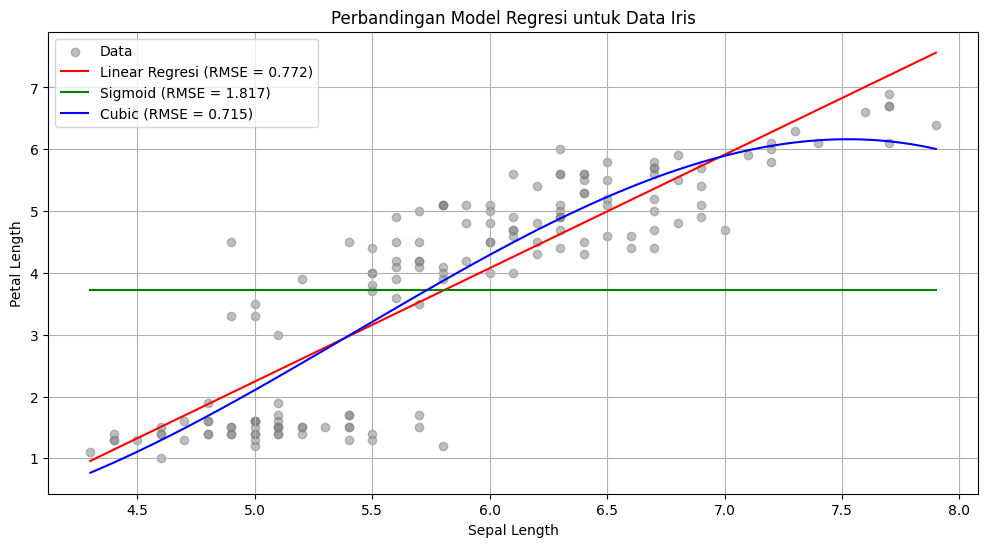

In [24]:
plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='gray', alpha=0.5, label='Data')

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_line, lr.predict(X_line), 'r-', label=f'Linear Regresi (RMSE = {rmse_linear:.3f})')
plt.plot(X_line, sigmoid(X_line, *sigmoid_params), 'g-', label=f'Sigmoid (RMSE = {rmse_sigmoid:.3f})')
plt.plot(X_line, cubic(X_line, *cubic_params), 'b-', label=f'Cubic (RMSE = {rmse_cubic:.3f})')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Perbandingan Model Regresi untuk Data Iris')
plt.legend()
plt.grid(True)
plt.show()

Interpretasi: Jadi, berdasarkan grafik scatterplot diatas, dapat kita simpulkan bahwa model linear regression adalah yang paling efektif untuk memprediksi hubungan sepal length dan petal length dengan akurasi mencapai 77% dan RMSE menunjukkan rata-rata kesalahan prediksi (semakin kecil semakin baik). Sepal length dan petal length memiliki hubungan yang kuat dan positif, yang berarti bahwa panjang sepal yang lebih besar berkaitan dengan panjang petal yang juga lebih besar. Model sigmoid dan cubic regression tampaknya tidak memberikan peningkatan yang signifikan, bahkan berpotensi menurunkan performa prediksi di beberapa rentang data